In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
def generate_scores(num_students, weights):
    scores = np.random.uniform(0, 10, (num_students, 4))  # Điểm ngẫu nhiên từ 0 đến 10
    total_scores = np.dot(scores, weights) / 100
    return scores, total_scores

# Trọng số cho Môn 1 và Môn 2
weights_mon1 = [10, 10, 20, 60]
weights_mon2 = [10, 20, 20, 50]

# Sinh dữ liệu
scores_mon1, total_scores_mon1 = generate_scores(500, weights_mon1)
scores_mon2, total_scores_mon2 = generate_scores(500, weights_mon2)
# hàm này sẽ tạo và tính toán điểm số theo trọng số
#scores_mon1 sẽ lưu trữ giá trị điểm số của  học sinh
# total_scores_mon1 tính tổng điểm của số học sinh đó 

In [3]:
scores = np.vstack([scores_mon1, scores_mon2])
total_scores = np.concatenate([total_scores_mon1, total_scores_mon2])
# tiến hành gộp cột điểm thành phần và cột điểm cuối cùng 
# Lấy 3 cột đầu làm X và cột cuối làm y
scores = np.round(scores, 2)

X = scores[:, :3]
print(X.shape)
y = scores[:, -1]
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(1000, 3)
(1000,)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_dnn_model(input_shape):
    model = Sequential()
    model.add(Dense(100, input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))  # Một neuron đầu ra cho dự đoán điểm số liên tục
    return model

# Tạo và biên dịch mô hình
model = create_dnn_model((X_train.shape[1],))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Huấn luyện mô hình
model_history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test MAE: {mae}")


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 21.4747 - mae: 3.7624 - val_loss: 10.3270 - val_mae: 2.7424
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7479 - mae: 2.6299 - val_loss: 9.9265 - val_mae: 2.7039
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3967 - mae: 2.7267 - val_loss: 9.6522 - val_mae: 2.6756
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3513 - mae: 2.7310 - val_loss: 9.8657 - val_mae: 2.7051
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1635 - mae: 2.6817 - val_loss: 9.6327 - val_mae: 2.6779
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2352 - mae: 2.7431 - val_loss: 9.5643 - val_mae: 2.6543
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8652 - mae: 2.6327 - val_loss: 9.6644 - val_mae: 2.6805
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0379 - mae: 2.7020 - val_loss: 9.2283 - val_mae: 2.6322
Epoch 9/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5674 

In [6]:
# Dự đoán điểm số
prediction = model.predict(np.array([[8,7,9]]))
print("Predictions: ", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predictions:  [[4.915307]]


In [8]:
# Save the model to disk
model.save('bai2.h5')

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Reshape dữ liệu để phù hợp với CNN (samples, features, 1)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # (1000, 3, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # (200, 3, 1)

# Xây dựng mô hình CNN
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(64, 1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(1))  
    model.add(Conv1D(128, 1, activation='relu'))
    model.add(MaxPooling1D(1))  
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(1)) 
    model.summary()
    
    return model

input_shape = (3, 1)  # Dữ liệu có 3 đặc trưng

model_cnn = create_cnn_model(input_shape)

# Biên dịch mô hình
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình
model_cnn_history = model_cnn.fit(X_train_cnn, y_train, epochs=60, batch_size=32, validation_data=(X_test_cnn, y_test))

# Đánh giá mô hình CNN
loss, mae = model_cnn.evaluate(X_test_cnn, y_test)
print(f"CNN Test loss: {loss}, Test MAE: {mae}")


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3, 64)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3, 128)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        38,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,049 (183.79 KB)

 Trainable params: 47,049 (183.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15.6829 - mae: 3.1871 - val_loss: 10.8142 - val_mae: 2.8048
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.6943 - mae: 2.7349 - val_loss: 10.4621 - val_mae: 2.7685
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4825 - mae: 2.6143 - val_loss: 10.3217 - val_mae: 2.7504
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4836 - mae: 2.6374 - val_loss: 9.9447 - val_mae: 2.7110
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7010 - mae: 2.6499 - val_loss: 9.6627 - val_mae: 2.6829
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6099 - mae: 2.6342 - val_loss: 9.8103 - val_mae: 2.6959
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4001 - mae: 2.6030 - val_loss: 9.2940 - val_mae: 2.6403
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2866 - mae: 2.6174 - val_loss: 9.1158 - val_mae: 2.6230
Epoch 9/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7730 - 

In [10]:
# Dự đoán điểm số
prediction = model_cnn.predict(np.array([[8,7,9]]))
print("Predictions: ", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predictions:  [[5.51535]]


In [12]:
# Save the model to disk using TensorFlow's save method
model_cnn.save('bai2_cnn.h5')

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Reshape dữ liệu để phù hợp với RNN (samples, time_steps, features)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # (1000, 3, 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # (200, 3, 1)

# Xây dựng mô hình RNN với 7 lớp
def create_rnn_model(input_shape):
    model = Sequential()

    for _ in range(5):
        model.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=input_shape))

    model.add(Dropout(0.1))
    model.add(Dense(1))  # Dự đoán một giá trị liên tục
    
    return model

input_shape = (3, 1)

# Tạo mô hình RNN
model_rnn = create_rnn_model(input_shape)

# Biên dịch mô hình
model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình RNN
model_rnn_history = model_rnn.fit(X_train_rnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_rnn, y_test))

# Đánh giá mô hình RNN
loss, mae = model_rnn.evaluate(X_test_rnn, y_test)
print(f"RNN Test loss: {loss}, Test MAE: {mae}")


Epoch 1/30


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 20.7121 - mae: 3.7227 - val_loss: 12.3876 - val_mae: 2.9060
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.8105 - mae: 2.9714 - val_loss: 11.1749 - val_mae: 2.7961
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.2208 - mae: 2.7936 - val_loss: 10.7198 - val_mae: 2.7531
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.7988 - mae: 2.7347 - val_loss: 10.9111 - val_mae: 2.7826
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.3052 - mae: 2.7011 - val_loss: 9.5982 - val_mae: 2.6544
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0207 - mae: 2.6818 - val_loss: 9.2501 - val_mae: 2.6245
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7727 - mae: 2.5215 - val_loss: 8.8420 - val_mae: 2.5861
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0229 - mae: 2.5933 - val_loss: 8.8033 - val_mae: 2.5834
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9942 - mae: 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape dữ liệu để phù hợp với LSTM (samples, time_steps, features)
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # (1000, 3, 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # (200, 3, 1)

# Xây dựng mô hình LSTM với 7 lớp
def create_lstm_model(input_shape):
    model = Sequential()

    for _ in range(5):
        model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape))
        
    model.add(Dropout(0.1))
    model.add(Dense(1))  # Dự đoán một giá trị liên tục
    
    return model

# Định nghĩa input_shape cho LSTM (3 đặc trưng)
input_shape = (3, 1)

# Tạo mô hình LSTM
model_lstm = create_lstm_model(input_shape)

# Biên dịch mô hình
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình LSTM
model_lstm_history = model_lstm.fit(X_train_lstm, y_train, epochs=30, batch_size=32, validation_data=(X_test_lstm, y_test))

# Đánh giá mô hình LSTM
loss, mae = model_lstm.evaluate(X_test_lstm, y_test)
print(f"LSTM Test loss: {loss}, Test MAE: {mae}")


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 32.4745 - mae: 4.8315 - val_loss: 29.6439 - val_mae: 4.5740
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.2528 - mae: 4.4649 - val_loss: 23.8140 - val_mae: 3.9928
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.1681 - mae: 4.0593 - val_loss: 19.9239 - val_mae: 3.6268
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.1234 - mae: 3.6774 - val_loss: 18.3429 - val_mae: 3.4724
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.6309 - mae: 3.5151 - val_loss: 17.2168 - val_mae: 3.3615
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6174 - mae: 3.4260 - val_loss: 15.8521 - val_mae: 3.2313
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.9900 - mae: 3.1410 - val_loss: 13.4638 - val_mae: 3.0148
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.7036 - mae: 2.9254 - val_loss: 11.2569 - val_mae: 2.8023
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

In [15]:
# Dự đoán điểm số
prediction = model_rnn.predict(np.array([[8,7,9]]))
print("Predictions: ", prediction[0][2][0])
# Dự đoán điểm số
prediction = model_lstm.predict(np.array([[8,7,9]]))
print("Predictions: ", prediction[0,2,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Predictions:  4.649876
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
Predictions:  5.046217


In [16]:
model_rnn.save('bai2_rnn.h5')

In [17]:
model_lstm.save('bai2_lstm.h5')

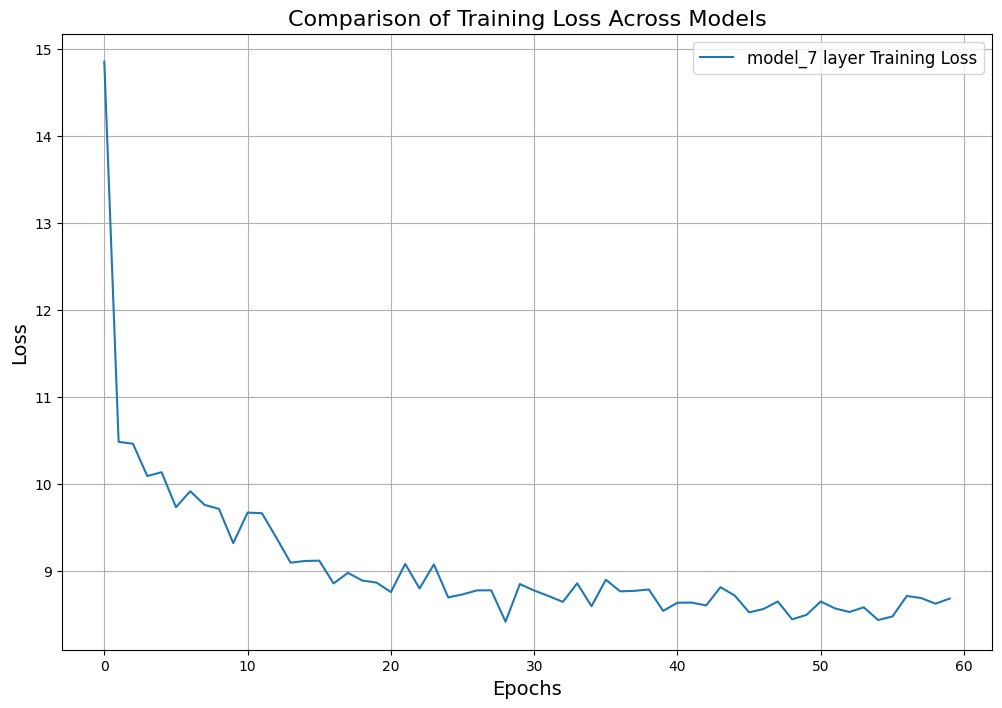

In [18]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường để so sánh loss giữa các mô hình
plt.figure(figsize=(12, 8))

plt.plot(model_history.history['loss'], label='model_7 layer Training Loss')

# Thêm nhãn
plt.title('Comparison of Training Loss Across Models', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Hiển thị chú thích
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


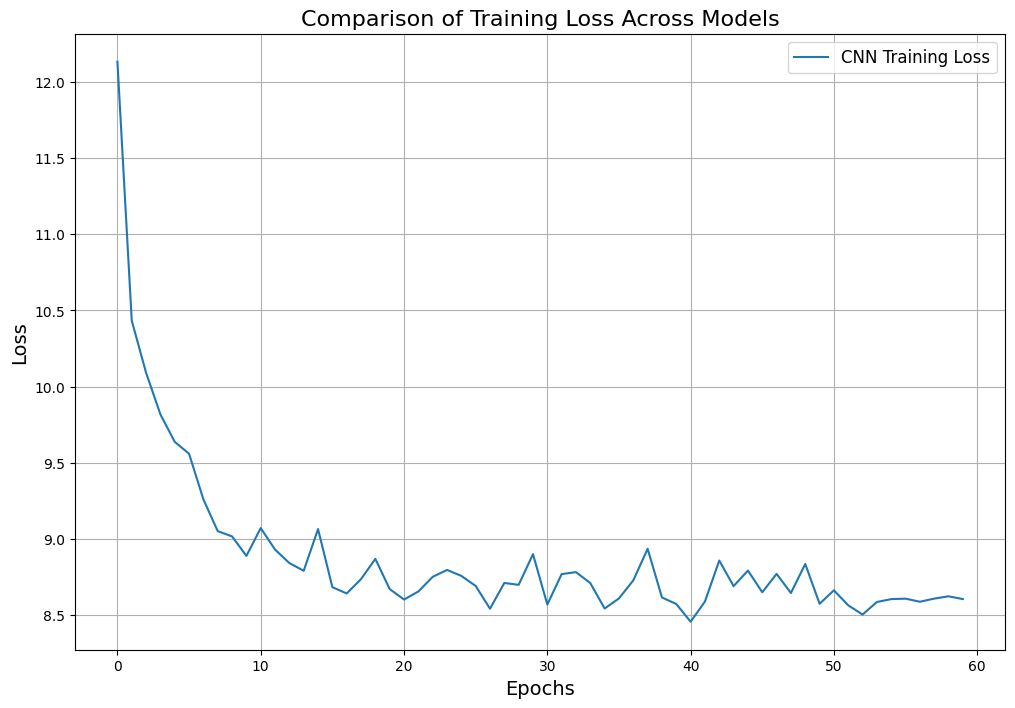

In [19]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường để so sánh loss giữa các mô hình
plt.figure(figsize=(12, 8))

plt.plot(model_cnn_history.history['loss'], label='CNN Training Loss')

# Thêm nhãn
plt.title('Comparison of Training Loss Across Models', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Hiển thị chú thích
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


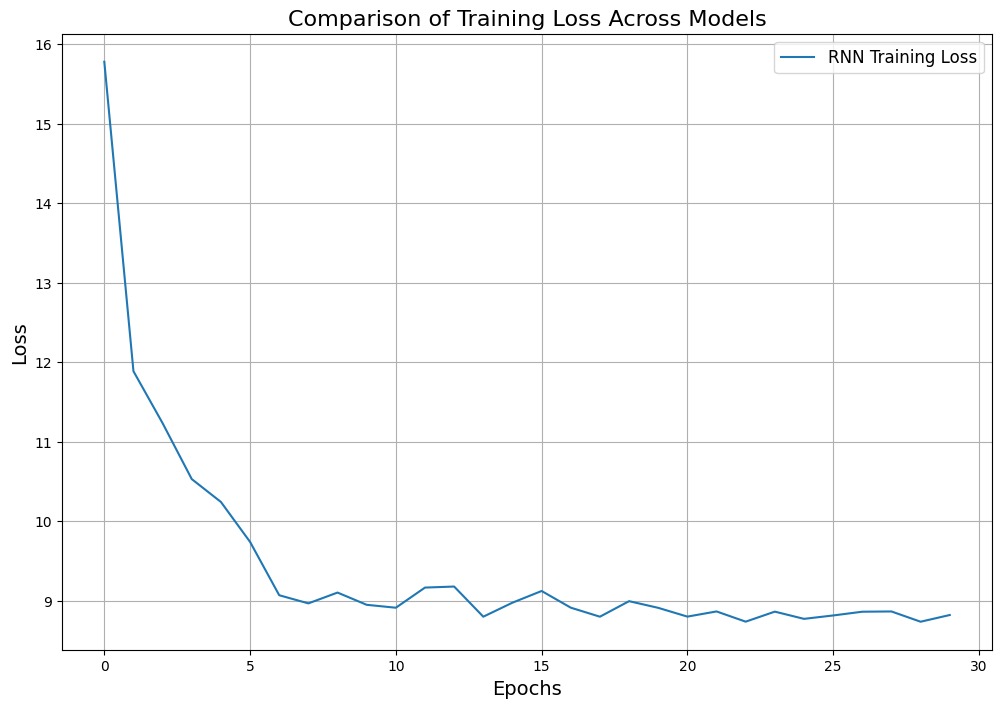

In [20]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường để so sánh loss giữa các mô hình
plt.figure(figsize=(12, 8))

plt.plot(model_rnn_history.history['loss'], label='RNN Training Loss')

# Thêm nhãn
plt.title('Comparison of Training Loss Across Models', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Hiển thị chú thích
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


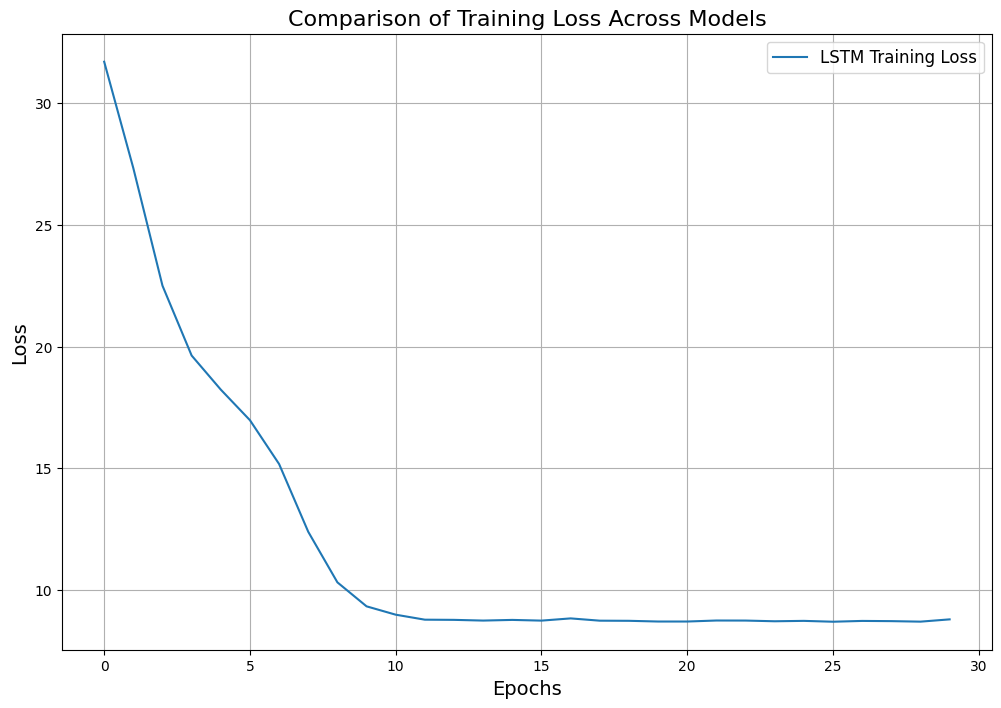

In [21]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường để so sánh loss giữa các mô hình
plt.figure(figsize=(12, 8))

plt.plot(model_lstm_history.history['loss'], label='LSTM Training Loss')

# Thêm nhãn
plt.title('Comparison of Training Loss Across Models', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Hiển thị chú thích
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


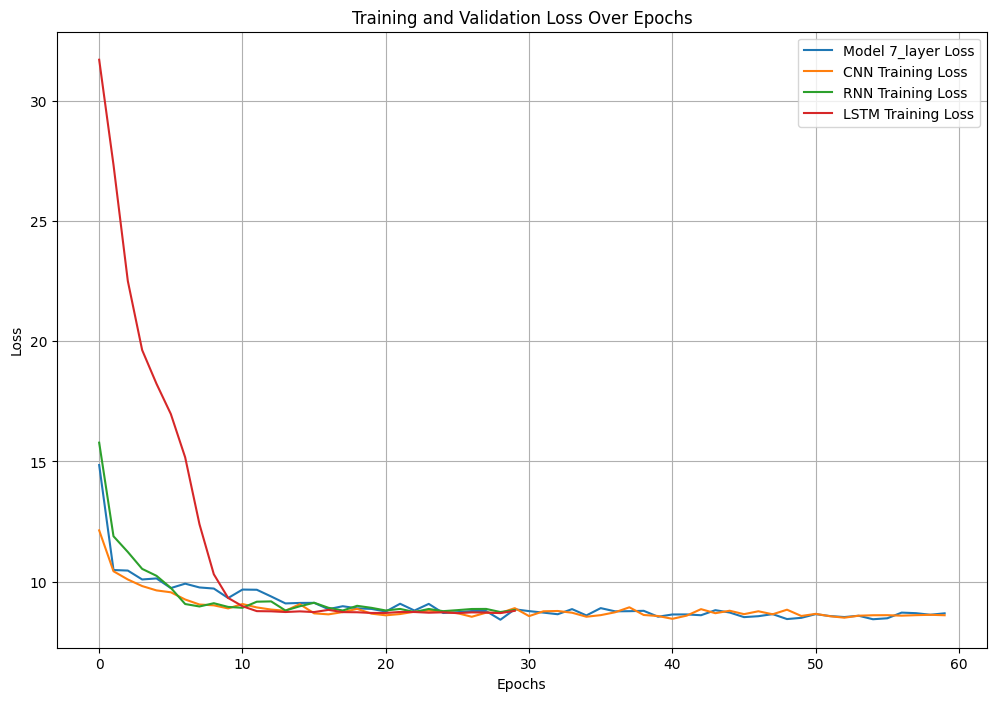

In [22]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường để so sánh loss giữa các mô hình
plt.figure(figsize=(12, 8))

plt.plot(model_history.history['loss'], label='Model 7_layer Loss')

# Vẽ loss của mô hình CNN
plt.plot(model_cnn_history.history['loss'], label='CNN Training Loss')

# Vẽ loss của mô hình RNN
plt.plot(model_rnn_history.history['loss'], label='RNN Training Loss')

# Vẽ loss của mô hình LSTM
plt.plot(model_lstm_history.history['loss'], label='LSTM Training Loss')

# Thiết lập tiêu đề và các thông số cho biểu đồ
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


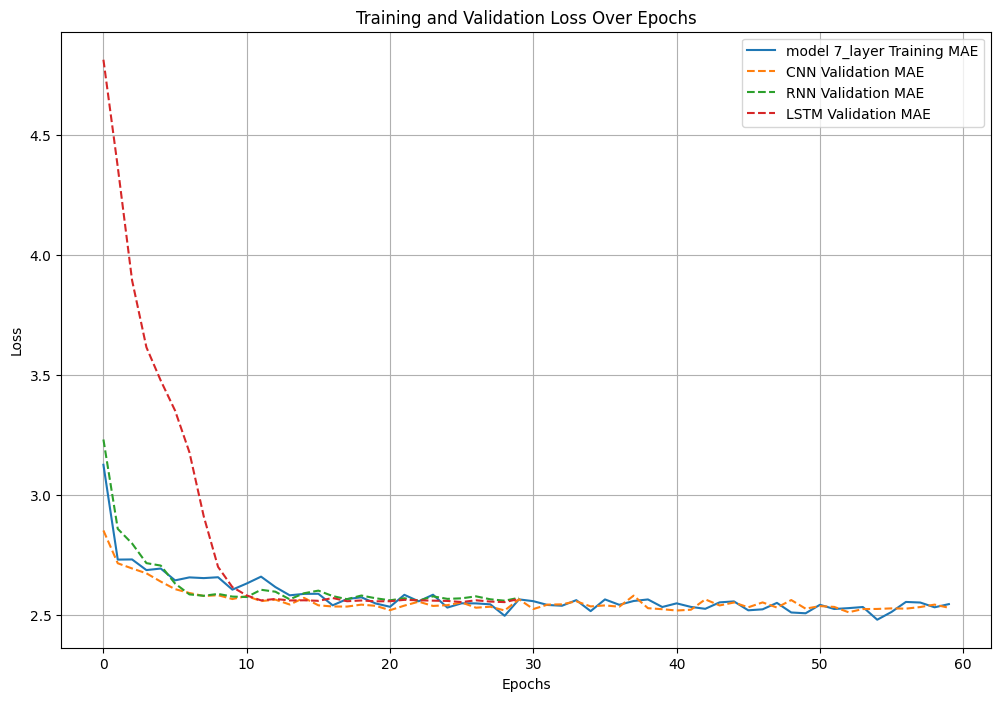

In [23]:
# Vẽ biểu đồ đường để so sánh loss giữa các mô hình
plt.figure(figsize=(12, 8))

plt.plot(model_history.history['mae'], label='model 7_layer Training MAE')

# Vẽ loss của mô hình CNN
plt.plot(model_cnn_history.history['mae'], label='CNN Validation MAE', linestyle='--')

# Vẽ loss của mô hình RNN
plt.plot(model_rnn_history.history['mae'], label='RNN Validation MAE', linestyle='--')

# Vẽ loss của mô hình LSTM
plt.plot(model_lstm_history.history['mae'], label='LSTM Validation MAE', linestyle='--')

# Thiết lập tiêu đề và các thông số cho biểu đồ
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
